In [ ]:
import time
import sys
from os import path
sys.path.append(path.join(path.dirname(path.abspath("__file__")), '..'))
from pprint import pprint

import aestimo
import database
import config
from aeslibs.aestimo_poisson1d import amort_wave
time0 = time.time() # timing audit
# TEMPERATURE


In [2]:
T = 60.0 #Kelvin
computation_scheme = 0
# drawFigures = True

# QUANTUM
# Total subband number to be calculated for electrons
subnumber_h = 3
subnumber_e = 3
# APPLIED ELECTRIC FIELD
Fapplied =  0.0# (V/m)-20e8
vmax= 2
vmin= 0.0
Each_Step=0.05# --------------------------------
# REGIONAL SETTINGS FOR SIMULATION
# --------------------------------
contact=0.0
# GRID
# For 1D, z-axis is choosen
gridfactor = 0.1#nm
maxgridpoints = 200000 #for controlling the size
mat_type='Zincblende'

yfrac = 0.0
xfrac = 0.3
dopant = 2e16

material=[[20.0, 'AlGaAs',  xfrac, yfrac, 0.0, 'n','b'],
            [11.0, 'GaAs', 0, 0,dopant, 'n','w'],
            [2.0, 'AlGaAs', xfrac, yfrac,0.0, 'n','b'],
            [11.0, 'GaAs', 0, 0,dopant, 'n','w'],
            [20.0, 'AlGaAs', xfrac, yfrac,0.0, 'n','b']]
#----------------------------------------
import numpy as np
x_max = sum([layer[0] for layer in material])
def round2int(x):
    return int(x+0.5)
n_max=round2int(x_max/gridfactor)
#----------------------------------------
dop_profile=np.zeros(n_max)
#----------------------------------------
Quantum_Regions=False
Quantum_Regions_boundary=np.zeros((1,2)) #still required when false
# Quantum_Regions_boundary[0,0]=25
# Quantum_Regions_boundary[0,1]=70
#----------------------------------------
surface=np.zeros(2)

INFO Total layer number: 5
INFO Total number of materials in database: 27
INFO Ntotal2d 4.4e+14 m**-2
INFO Iteration: 1


Predictor–corrector method is activated
Iteration: 1


INFO calculation time  0.284388 s


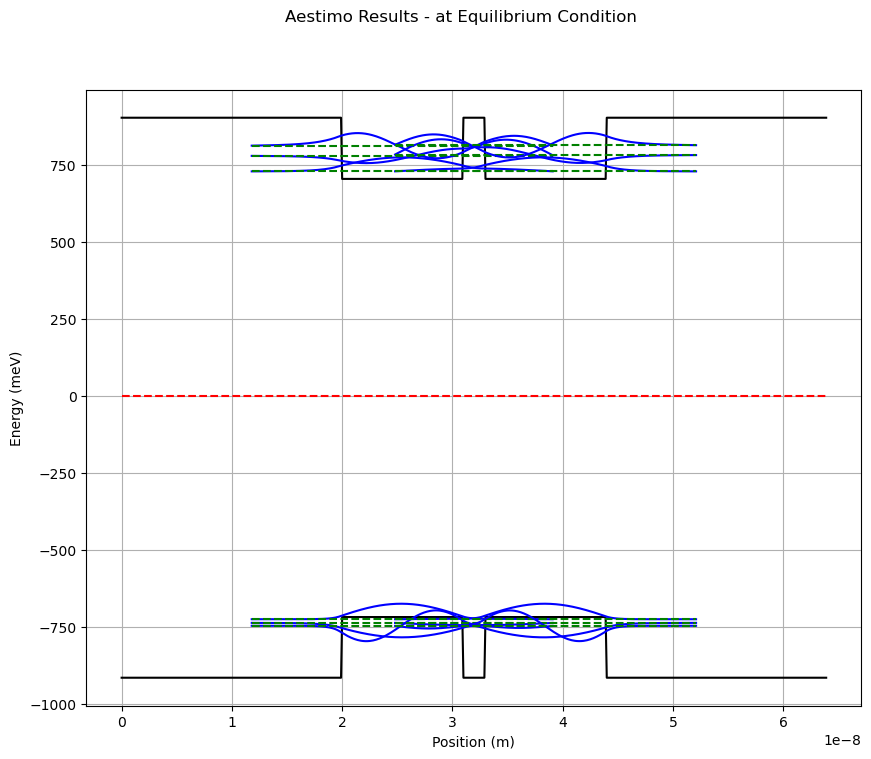

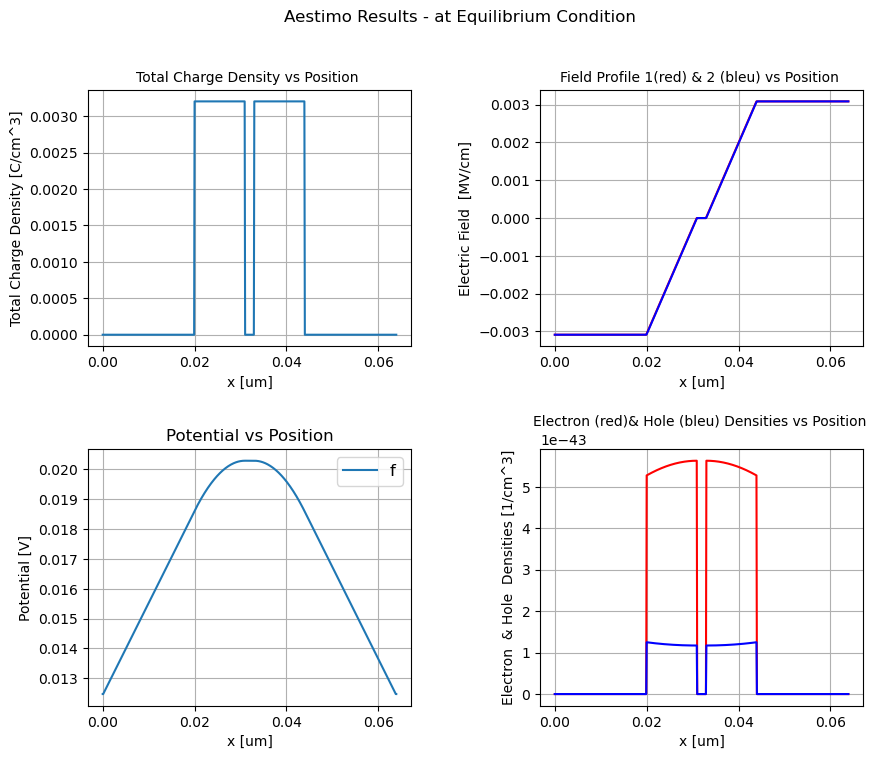

total running time= 5.3490259647369385


In [3]:

input_obj = vars()
# drawFigures = True
model = aestimo.StructureFrom(input_obj, database)
result = aestimo.Poisson_Schrodinger(model)
# result_dd = aestimo.Poisson_Schrodinger_DD(result,model)

# %matplotlib inline
aestimo.drawFigures = True
aestimo.save_and_plot(result,model)
# aestimo.save_and_plot2(result_dd,model)


time1 = time.time()
print("total running time=",time1-time0)


['EF', 'E_F_general', 'E_state', 'E_state_general', 'E_state_general0', 'E_statec', 'E_statec_general', 'E_statec_general0', 'Ec_result', 'Ev_result', 'F_general', 'Fapp', 'HUPMAT3_reduced_list', 'HUPMATC1', 'N_state', 'N_state_general', 'N_statec', 'N_statec_general', 'N_wells_virtual', 'Ntotal2d', 'Ppz_Psp', 'T', 'V', 'Well_boundary', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', 'dx', 'el_field1_result', 'el_field2_result', 'fi_e', 'fi_h', 'fi_result', 'fitot', 'fitotc', 'm_hh', 'm_lh', 'm_so', 'meff_state_general', 'meff_state_general0', 'meff_statec_general', 'meff_statec_general0', 'nf_result', 'pf_result', 'pol_surf_char', 'ro_

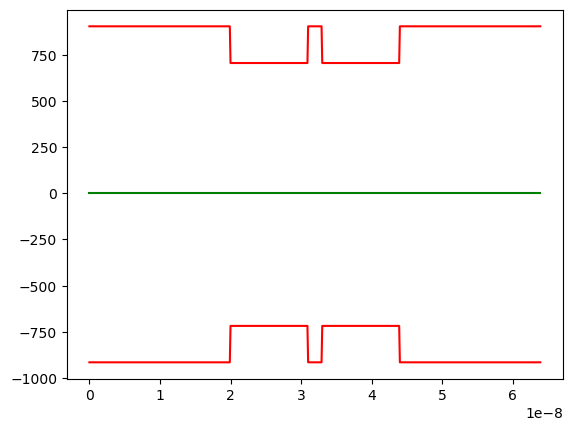

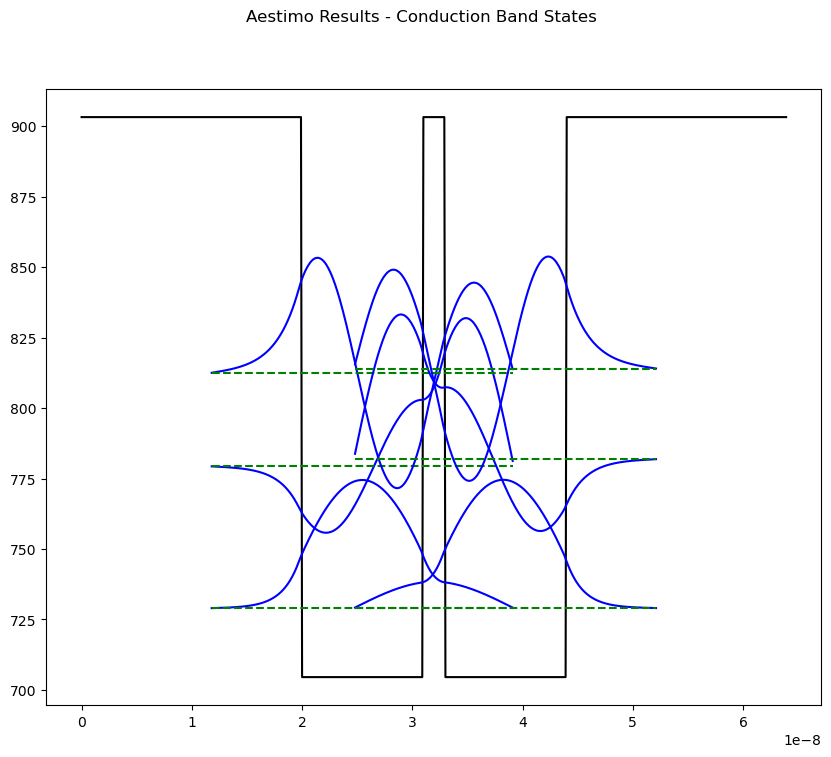

In [4]:
q = 1.602176e-19  # C
J2meV = 1e3 / q  # Joules to meV

print(dir(result))

# result.E_F_general
import matplotlib.pyplot as pl
pl.plot(result.xaxis,result.fi_h * J2meV,"r",result.xaxis,result.fi_e * J2meV,"r")
pl.plot(result.xaxis, result.V * J2meV, "g")
# pl.plot(result.xaxis, result.Vapp * J2meV, "b")
# pl.plot(result.xaxis, result.fitot * J2meV, "k", result.xaxis, result.fitotc * J2meV, "k")
# pl.plot(result.Ec_result)

CB_edge_meV = result.fi_e*J2meV
VB_edge_meV = result.fi_h*J2meV

print(max(CB_edge_meV))
print(min(VB_edge_meV))


# Initialize figure
span = np.ones(100000000)
fig1 = pl.figure(figsize=(10, 8))
pl.suptitle("Aestimo Results - Conduction Band States")
pl.subplot(1, 1, 1)

# Plot conduction band states
pl.plot(result.xaxis, result.fitotc * J2meV, "k")  # Total conduction band potential
for j in range(1, result.N_wells_virtual - 1):
    # Get quantum well boundaries
    I1, I2, I11, I22 = amort_wave(j, result.Well_boundary, model.n_max)
    i1 = I1 - I1
    i2 = I2 - I1

    # Plot conduction band energy levels and wavefunctions
    for levelc, statec in zip(result.E_statec_general[j, :], result.wfe_general[j, :, :]):
        pl.plot(
            result.xaxis[I1:I2],
            statec[i1:i2] * config.wavefunction_scalefactor + levelc,
            "b",  # Wavefunctions in blue
        )
        pl.plot(result.xaxis[I1:I2], levelc * span[I1:I2], "g", ls="--")  # Energy levels in green dashed lines